## K-means method
### Setting up for clustering analysis

In [21]:
import sklearn
import numpy as np
import pandas as pd
from sklearn import datasets
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, classification_report

from pylab import rcParams
import seaborn as sns
from collections import Counter

In [2]:
%matplotlib inline
plt.figure(figsize=(7,4))

<Figure size 700x400 with 0 Axes>

<Figure size 700x400 with 0 Axes>

In [3]:
iris = datasets.load_iris()

X = scale(iris.data) # type: ignore
y = pd.DataFrame(iris.target) # type: ignore
variable_names = iris.feature_names # type: ignore
X[0:10] # type: ignore

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

## Building and running your model

In [4]:
clustering = KMeans(n_clusters=3, random_state=5)
clustering.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,5
,copy_x,True
,algorithm,'lloyd'


## Plotting your model outputs


In [5]:
iris_df = pd.DataFrame(iris.data) # type: ignore
iris_df.columns = ['Sepal_Length', 'SSepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']

Text(0.5, 1.0, 'K Means Classification')

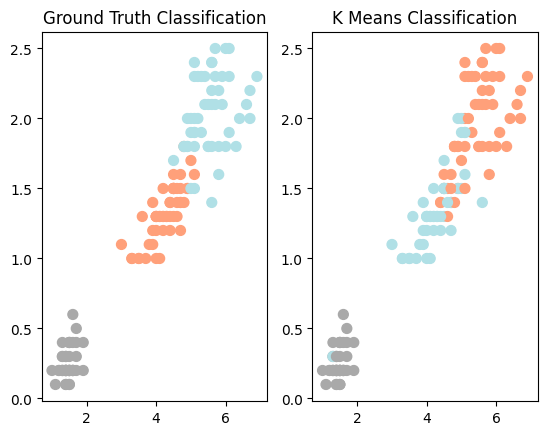

In [6]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)  # type: ignore
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('K Means Classification')


Text(0.5, 1.0, 'K Means Classification')

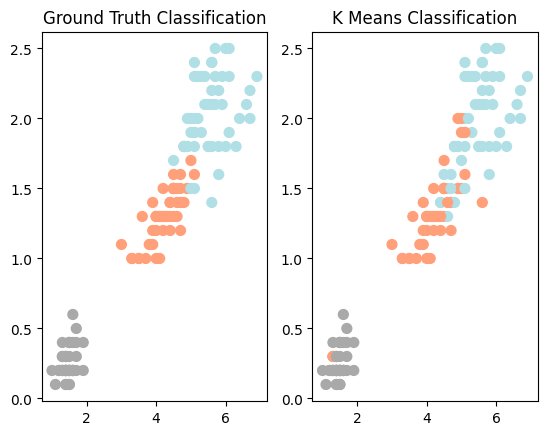

In [7]:
relabel = np.choose(clustering.labels_, [0,2,1]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)  # type: ignore
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K Means Classification')

## Evaluate your clustering results

In [8]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.80      0.74      0.77        50
           2       0.76      0.84      0.80        50

    accuracy                           0.85       150
   macro avg       0.86      0.85      0.85       150
weighted avg       0.86      0.85      0.85       150



In [9]:
from sklearn.cluster import AgglomerativeClustering
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [12]:
np.set_printoptions(precision=4,  suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
sns.set_style("whitegrid")

<Figure size 1000x300 with 0 Axes>

In [14]:
address = "D:/ala/lectures/Lynda - AI/python-for-data-science-and-machine-learning-essential-training-part-2-3016934-main/data/mtcars.csv"
cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb', ]
X = cars[['mpg', 'disp', 'hp', 'wt',]].values

y = cars.iloc[:, (9)].values


# Using Scipt to generate dendrograms

In [15]:
Z = linkage(X, 'ward')

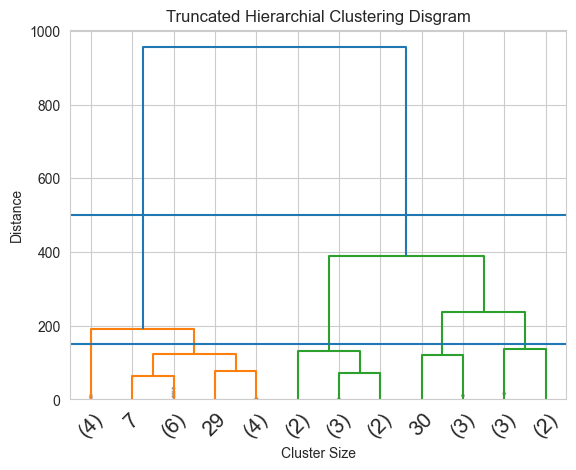

In [16]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15, show_contracted=True)

plt.title('Truncated Hierarchial Clustering Disgram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

## Generating Hierarchical Clusters

In [17]:
k=2
hClustering = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
hClustering.fit(X)
sm.accuracy_score(y, hClustering.labels_)

0.78125

In [19]:
k=2
hClustering = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='average')
hClustering.fit(X)
sm.accuracy_score(y, hClustering.labels_)

0.78125

In [20]:
k=2
hClustering = AgglomerativeClustering(n_clusters=k, metric='manhattan', linkage='average')
hClustering.fit(X)
sm.accuracy_score(y, hClustering.labels_)

0.71875

In [22]:
rcParams['figure.figsize'] = 5, 4

In [23]:
df = pd.read_csv('D:/ala/lectures/Lynda - AI/python-for-data-science-and-machine-learning-essential-training-part-2-3016934-main/data/iris.data.csv', header=None, sep=',')
df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species', ]
data = df.iloc[:, 0:4].values
target = df.iloc[:, 4].values
df[:5]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
from sklearn.cluster import DBSCAN


model = DBSCAN(eps=0.8, min_samples=19).fit(data)
print(model)

DBSCAN(eps=0.8, min_samples=19)


In [25]:
outliers_df = pd.DataFrame(data)
print(Counter(model.labels_))
print(outliers_df[model.labels_ == -1])

Counter({np.int64(1): 94, np.int64(0): 50, np.int64(-1): 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


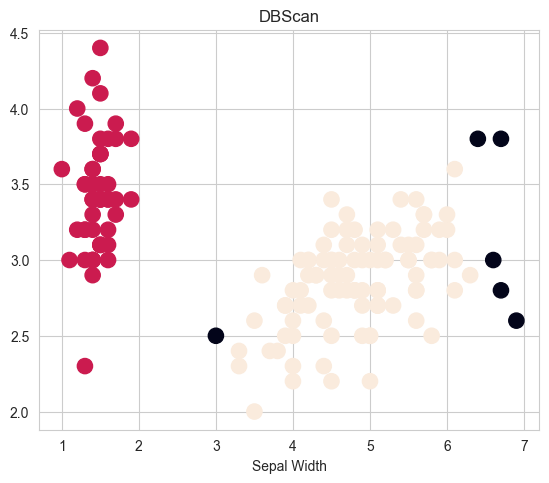

In [26]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
colors = model.labels_

ax.scatter(data[:, 2], data[:, 1], c=colors, s=120)
ax.set_xlabel('Petal Length')
ax.set_xlabel('Sepal Width')
plt.title("DBScan")
plt.show()